In [1]:
import numpy as np
import os
import pykitti
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
from keras.models import load_model
import formatData


Using TensorFlow backend.


In [2]:
model_dir = '/home/sexy/source/deep-visual-odometry/models/'
which_model = 'alexNet_3/train_7.h5'

model = load_model(model_dir+which_model)

In [3]:
tr_ratio = (8/10.0)

image_data = formatData.load_data()
pose_data = formatData.load_poses()
#Xtr, Ytr, Xte, Yte = formatData.knownEnv(image_data, pose_data, training_ratio=tr_ratio)

Loading poses for sequence 00...
done.
Loading poses for sequence 01...
done.
Loading poses for sequence 02...
done.
Loading poses for sequence 03...
done.
Loading poses for sequence 04...
done.
Loading poses for sequence 05...
done.
Loading poses for sequence 06...
done.
Loading poses for sequence 07...
done.
Loading poses for sequence 08...
done.
Loading poses for sequence 09...
done.
Loading poses for sequence 10...
done.


In [4]:
# split training and tests into each sequence
Xtr_list = []
Ytr_list = []
Xte_list = []
Yte_list = []
for i in range(11):
    _Xtr, _Ytr, _Xte, _Yte = formatData.knownEnv(image_data, pose_data, sequences=[i], training_ratio=tr_ratio)
    Xtr_list.append(_Xtr)
    Ytr_list.append(_Ytr)
    Xte_list.append(_Xte)
    Yte_list.append(_Yte)
    #print("Xtr_list[" + str(i) + "] = " + str(Xtr_list[i].shape))
    #print("Ytr_list[" + str(i) + "] = " + str(Ytr_list[i].shape))
    #print("Xte_list[" + str(i) + "] = " + str(Xte_list[i].shape))
    #print("Yte_list[" + str(i) + "] = " + str(Yte_list[i].shape))

# print shapes
#for i in range(len(image_data)):
#    print("image_data[" + str(i) + "] = " + str(image_data[i].shape))
#for i in range(len(pose_data)):
#    print("pose_data[" + str(i) + "] = " + str(pose_data[i].shape))
#print("Xtr = " + str(Xtr.shape))
#print("Ytr = " + str(Ytr.shape))
#print("Xte = " + str(Xte.shape))
#print("Yte = " + str(Yte.shape))

In [ ]:
predicted_output_s = []
predicted_output_te = []
predicted_output_tr = []

for i in range(11):
    # create a temp array with all of training and test of sequence i
    dim1 = Xtr_list[i][:,0,0,0].shape[0]+Xte_list[i][:,0,0,0].shape[0]
    temp_s = np.zeros((dim1, 128, 128, 6))
    temp_s[:Xtr_list[i][:,0,0,0].shape[0]] = Xtr_list[i]
    temp_s[Xtr_list[i][:,0,0,0].shape[0]:] = Xte_list[i]
    #predicted_output_s.append(model.predict_proba(temp_s, batch_size=4))
    #predicted_output_te.append(model.predict_proba(Xte_list[i], batch_size=4))
    predicted_output_tr.append(model.predict_proba(Xtr_list[i], batch_size=1))

  4/879 [..............................] - ETA: 7s

/usr/local/lib/python3.5/dist-packages/keras/models.py:815: UserWarning: Network returning invalid probability values. The last layer might not normalize predictions into probabilities (like softmax or sigmoid would).
  warnings.warn('Network returning invalid probability values. '


1120/3255 [=========>....................] - ETA: 18s

In [ ]:
plot_data_s = []
for i in range(11):
    temp_Ys = np.concatenate((Ytr_list[i],Yte_list[i]), axis=0)
    print(temp_Ys.shape)
    plot_data_s.append(np.zeros((temp_Ys.shape[0],4)))
    for j in range(Yte_list[i].shape[0]):
        plot_data_s[i][j,0] = np.sum(temp_Ys[:j,0])
        plot_data_s[i][j,1] = np.sum(temp_Ys[:j,2])
        plot_data_s[i][j,2] = np.sum(predicted_output_s[i][:j,0])
        plot_data_s[i][j,3] = np.sum(predicted_output_s[i][:j,2])

In [50]:
plot_data_tr = []
for i in range(11):
    print(Ytr_list[i].shape)
    plot_data_tr.append(np.zeros((Ytr_list[i].shape[0],4)))
    for j in range(Yte_list[i].shape[0]):
        plot_data_tr[i][j,0] = np.sum(Ytr_list[i][:j,0])
        plot_data_tr[i][j,1] = np.sum(Ytr_list[i][:j,2])
        plot_data_tr[i][j,2] = np.sum(predicted_output_tr[i][:j,0])
        plot_data_tr[i][j,3] = np.sum(predicted_output_tr[i][:j,2])

(909, 3)


IndexError: list index out of range

In [22]:
plot_data_te = []
for i in range(11):
    print(Yte_list[i].shape)
    plot_data_te.append(np.zeros((Yte_list[i].shape[0],4)))
    for j in range(Yte_list[i].shape[0]):
        plot_data_te[i][j,0] = np.sum(Yte_list[i][:j,0])
        plot_data_te[i][j,1] = np.sum(Yte_list[i][:j,2])
        plot_data_te[i][j,2] = np.sum(predicted_output_te[i][:j,0])
        plot_data_te[i][j,3] = np.sum(predicted_output_te[i][:j,2])

(909, 3)
909
(221, 3)
221
(933, 3)
933
(161, 3)
161
(55, 3)
55
(553, 3)
553
(221, 3)
221
(221, 3)
221
(815, 3)
815
(319, 3)
319
(241, 3)
241


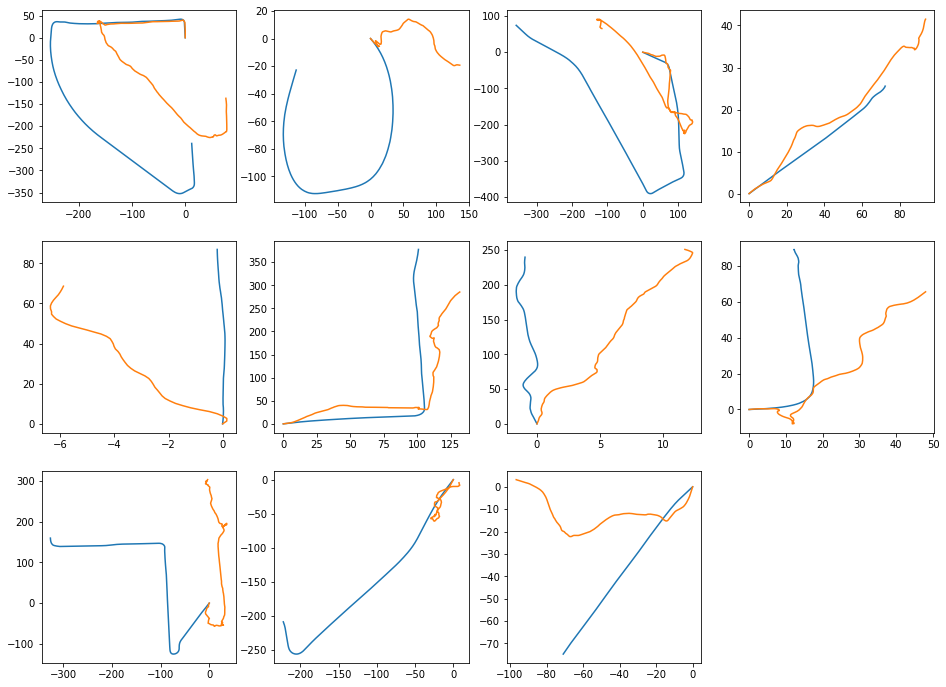

In [48]:
plt.figure(1, figsize=(16,12))
for i in range(11):
    plt.subplot(3,4,i+1)
    plt.plot(plot_data_te[i][:,0], plot_data_te[i][:,1], plot_data_te[i][:,2], plot_data_te[i][:,3])
    
plt.show()